In [1]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# Day csv

In [2]:
day = read.csv("Bike-Sharing-Dataset//day.csv", header = TRUE)

In [3]:
day$dteday = as.Date(day$dteday, format = "%Y-%m-%d") # converting 'dteday' column to date

In [4]:
head(day, 30)
colSums(is.na(day))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.3441670,0.3636250,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.3634780,0.3537390,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.1963640,0.1894050,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.2000000,0.2121220,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.2269570,0.2292700,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.2043480,0.2332090,0.518261,0.0895652,88,1518,1606
7,7,2011-01-07,1,0,1,0,5,1,2,0.1965220,0.2088390,0.498696,0.1687260,148,1362,1510
8,8,2011-01-08,1,0,1,0,6,0,2,0.1650000,0.1622540,0.535833,0.2668040,68,891,959
9,9,2011-01-09,1,0,1,0,0,0,1,0.1383330,0.1161750,0.434167,0.3619500,54,768,822


instant     dteday     season         yr       mnth    holiday    weekday 
         0          0          0          0          0          0          0 
workingday weathersit       temp      atemp        hum  windspeed     casual 
         0          0          0          0          0          0          0 
registered        cnt 
         0          0

In [5]:
str(day)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Date, format: "2011-01-01" "2011-01-02" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


The dateday column has been explicitly converted to date format, it was 'char' by default.

In [6]:
dim(day)

[1] 731  16

In [7]:
day$rawtemp = day$temp*41 # converting temp to raw form from normalized form
head(day)$rawtemp
day$rawatemp = day$atemp*50 # converting atemp to raw form from normalized form
head(day)$rawatemp
day$rawhum = day$hum*100 # converting hum to raw form from normalized form
head(day)$rawhum
day$rawwindspeed = day$windspeed*67 # converting windspeed to raw form from normalized form
head(day)$rawwindspeed

[1] 14.110847 14.902598  8.050924  8.200000  9.305237  8.378268

[1] 18.18125 17.68695  9.47025 10.60610 11.46350 11.66045

[1] 80.5833 69.6087 43.7273 59.0435 43.6957 51.8261

[1] 10.749882 16.652113 16.636703 10.739832 12.522300  6.000868

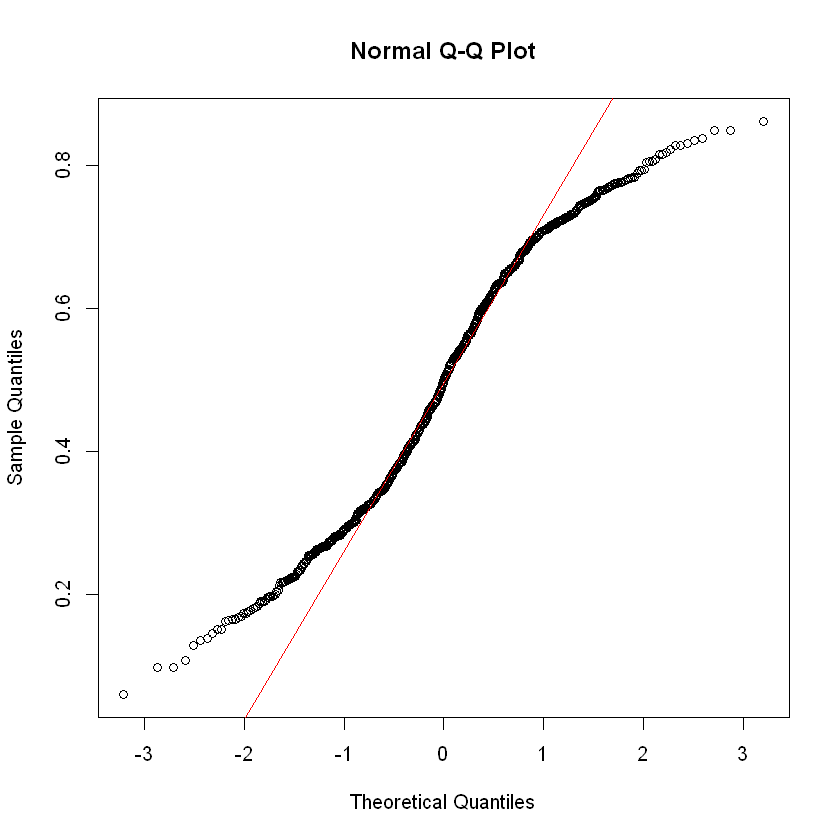

In [8]:
qqnorm(day$temp)
qqline(day$temp, col = "red")

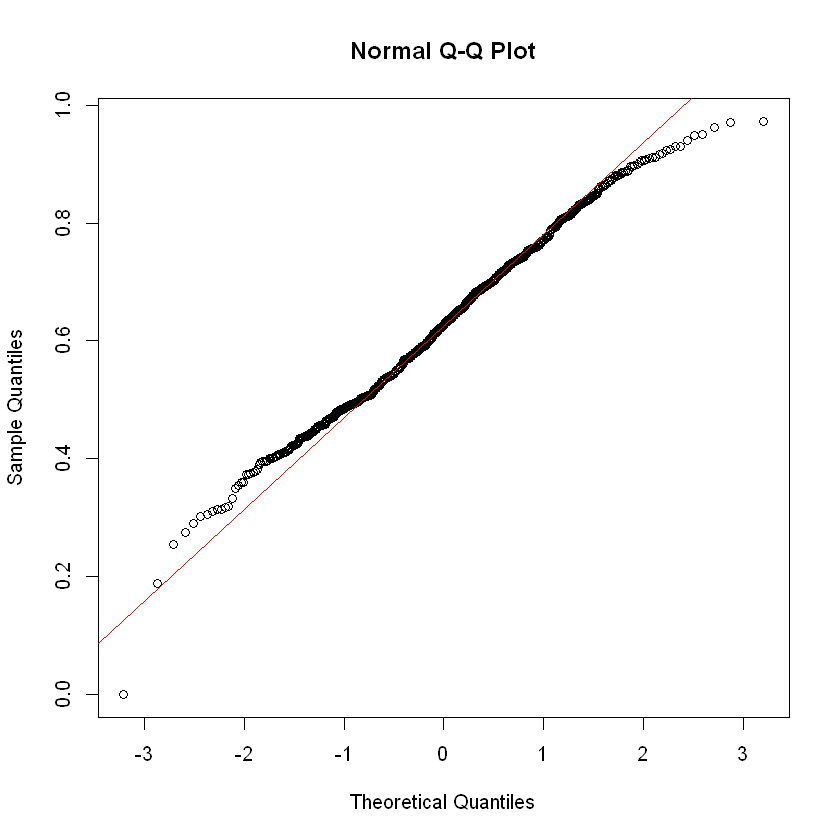

In [9]:
qqnorm(day$hum)
qqline(day$hum, col = "red")

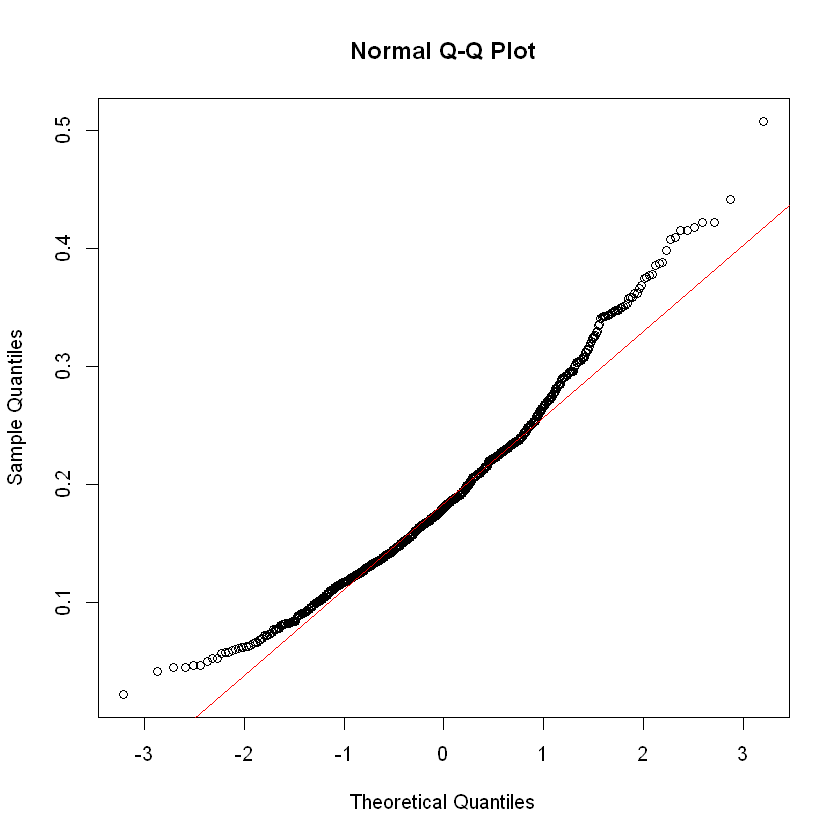

In [10]:
qqnorm(day$windspeed)
qqline(day$windspeed, col = "red")

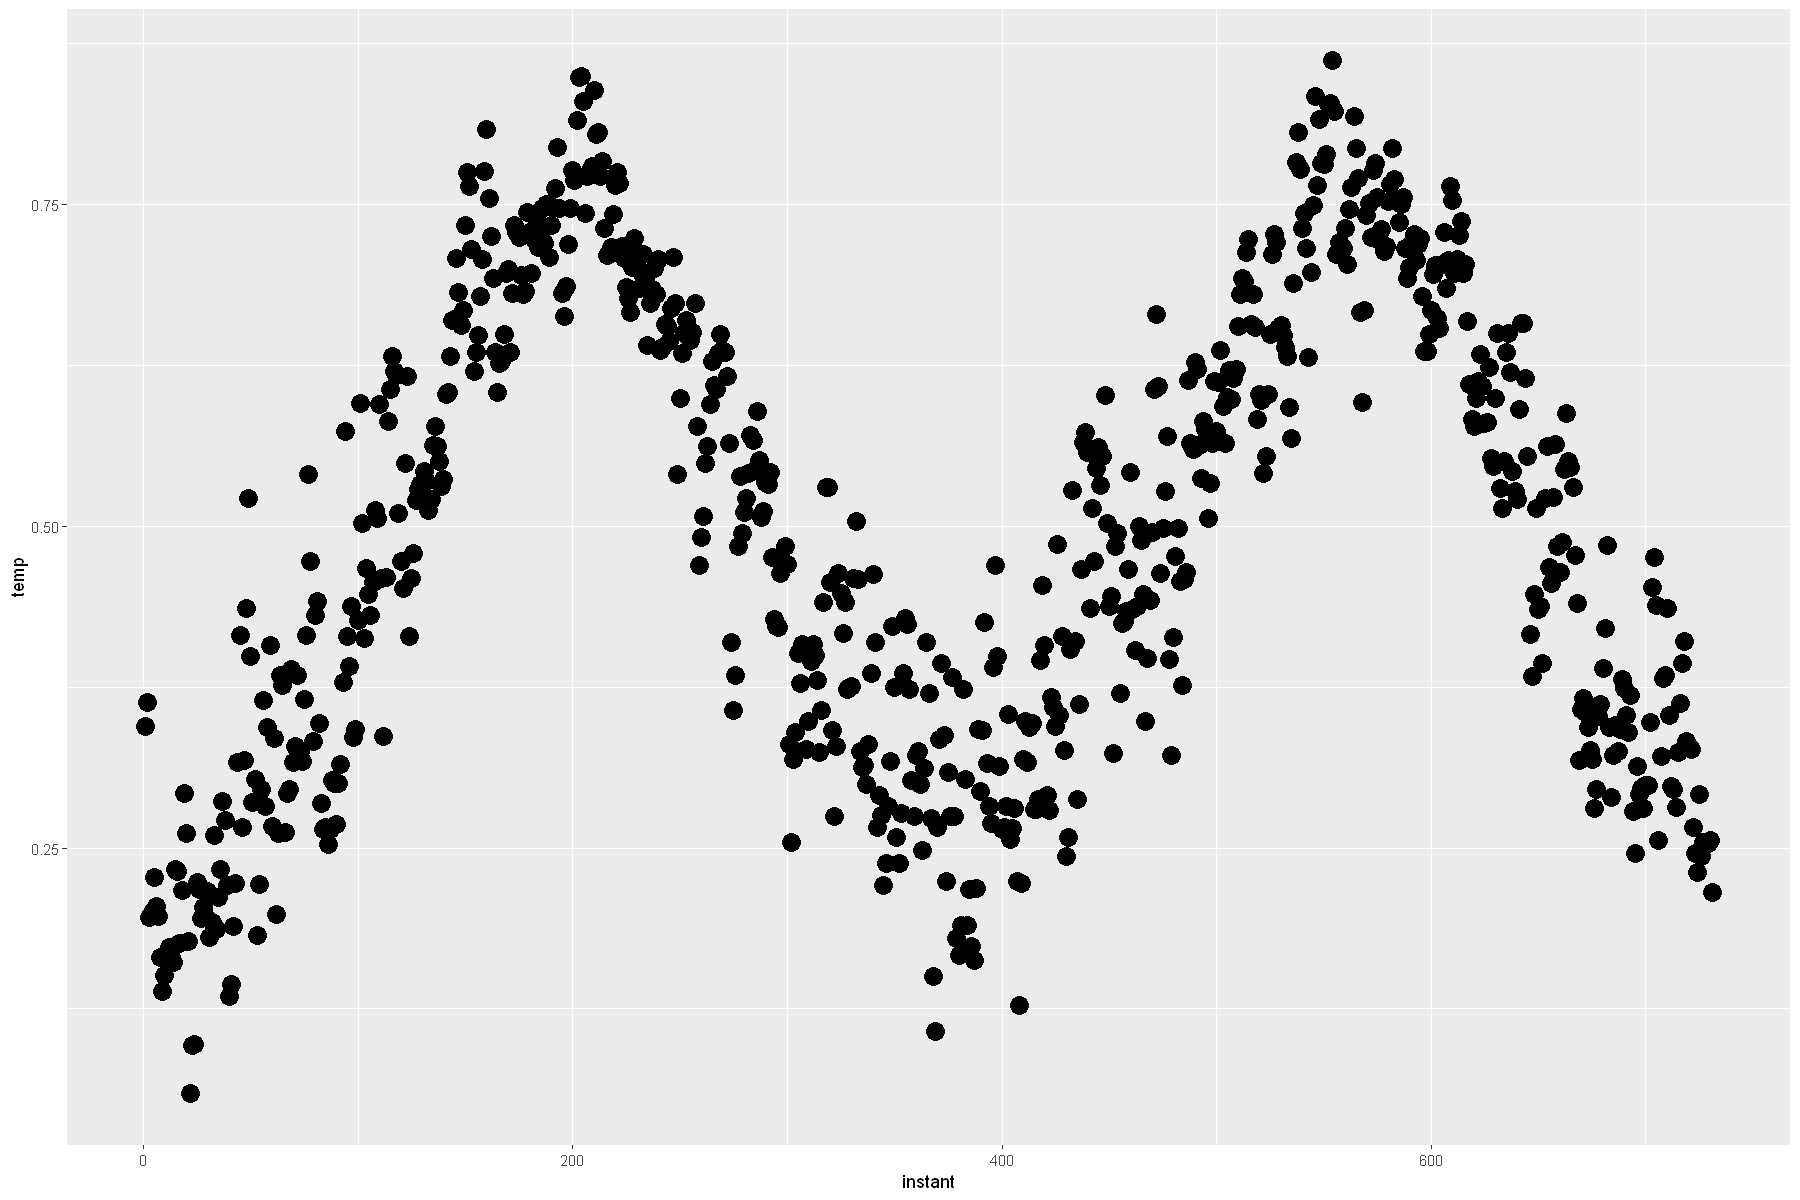

In [27]:
options(repr.plot.width = 15, repr.plot.height = 10)


ggplot(day, aes(x = instant, y = temp)) +
  geom_point(size= 5)

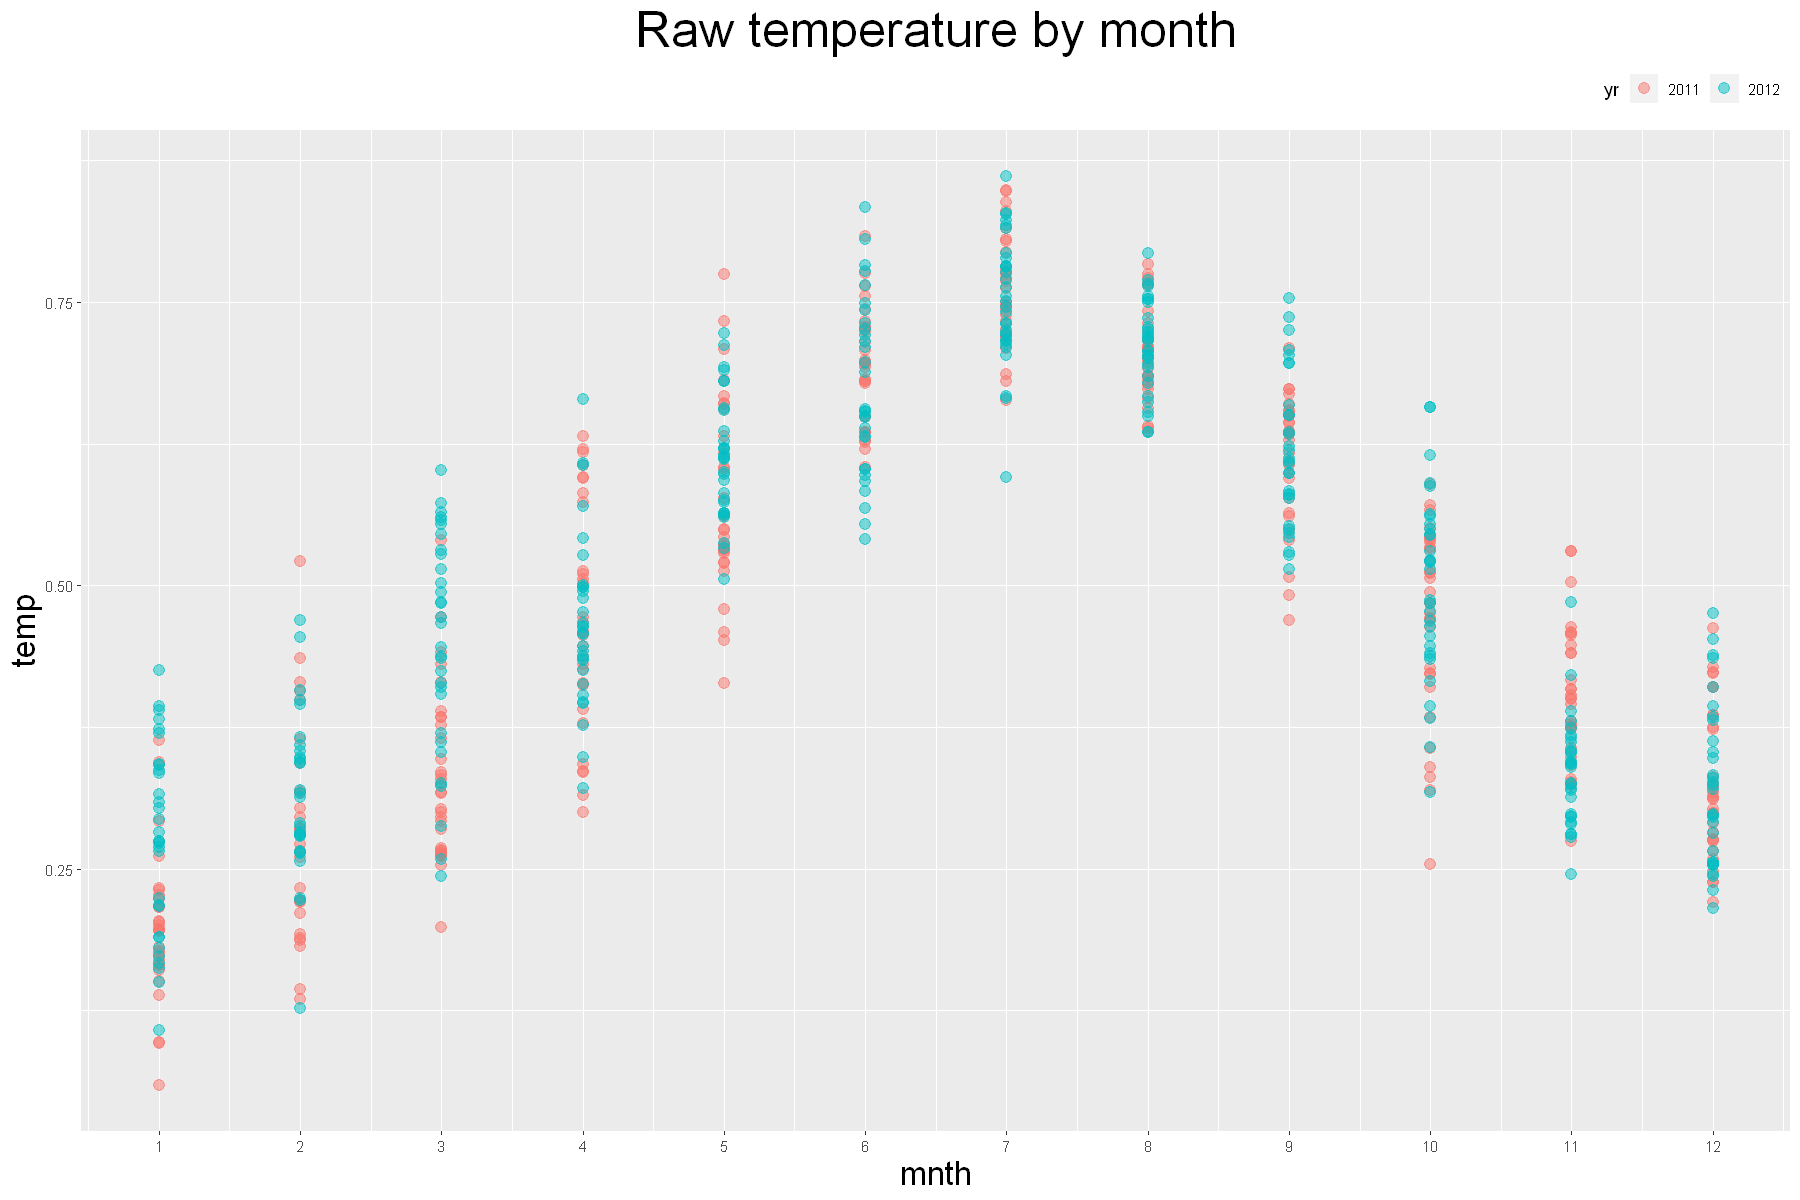

In [39]:
mydata = day
mydata$yr <- ifelse(mydata$yr == 0, 2011, 2012)
mydata$yr = factor(mydata$yr)

options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(mydata, aes(x = mnth, y = temp, color = yr)) +
  geom_point(size= 3, alpha = 0.5) +
scale_x_continuous(breaks = seq(1, 12, by = 1)) + 
labs(title = "Raw temperature by month") +
theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30, hjust = 0.5),
      legend.position = "top", legend.justification = "right")
# scale_x_continuous(breaks = seq(1, 12, by = 1))

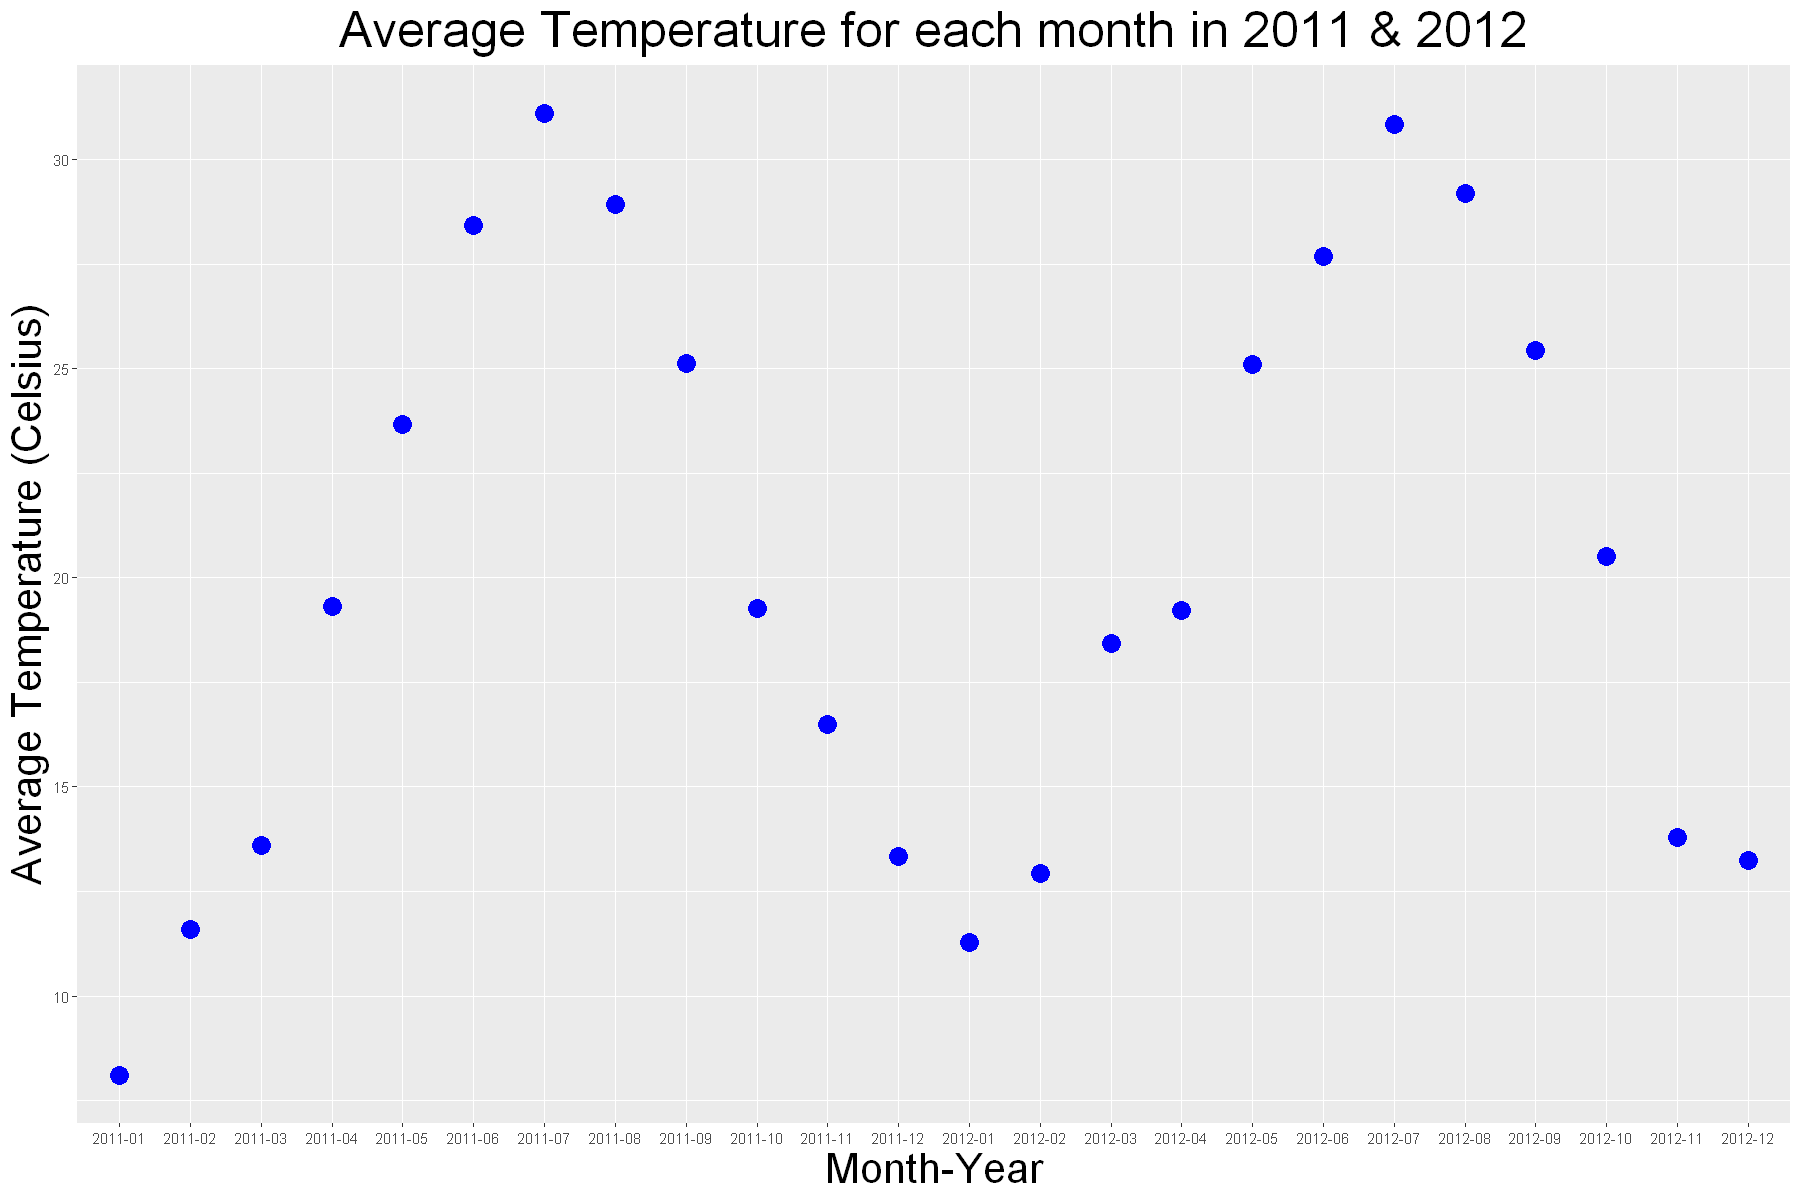

In [13]:
# aggregating data by month & year

df <- day %>% 
    mutate(month_year = format(dteday, "%Y-%m")) %>% 
    select(month_year, rawtemp)

# calculate average temperature by month and year

df_avg <- df %>% 
  group_by(month_year) %>% 
  summarise(avg_rawtemp = mean(rawtemp))


# plot the average temperature for each month per year

options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(df_avg, aes(x = month_year, y = avg_rawtemp)) + 
geom_point(size = 5, color = "blue") +
labs(x = "Month-Year", y = "Average Temperature (Celsius)") +
ggtitle("Average Temperature for each month in 2011 & 2012") +
theme(axis.title.x = element_text(size = 25), 
      axis.title.y = element_text(size = 25), 
      plot.title = element_text(size = 30, hjust = 0.5))

# Hour csv

In [14]:
hour = read.csv("Bike-Sharing-Dataset//hour.csv", header = TRUE)
head(hour)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [15]:
colSums(is.na(hour))

instant     dteday     season         yr       mnth         hr    holiday 
         0          0          0          0          0          0          0 
   weekday workingday weathersit       temp      atemp        hum  windspeed 
         0          0          0          0          0          0          0 
    casual registered        cnt 
         0          0          0

In [16]:
hour$dteday = as.Date(hour$dteday, format = "%Y-%m-%d") # converting 'dteday' column to date
head(hour)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [17]:
str(hour)

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Date, format: "2011-01-01" "2011-01-01" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


In [18]:
dim(hour)

[1] 17379    17

In [19]:
hour$rawtemp = hour$temp*41 # converting temp to raw form from normalized form
hour$rawatemp = hour$atemp*50 # converting atemp to raw form from normalized form
hour$rawhum = hour$hum*100 # converting atemp to raw form from normalized form
hour$rawwindspeed = hour$windspeed*67 # converting atemp to raw form from normalized form

# Monthly averages for both years

In [21]:
# creating monthly averages for the year 2011

year_2011 <- subset(day, yr == 0)
avg_counts_2011 <- aggregate(cnt ~ mnth, data = year_2011, FUN = mean)
avg_counts_2011$yr = 2011
avg_counts_2011$yr = factor(avg_counts_2011$yr)

# creating monthly averages for the year 2012

year_2012 <- subset(day, yr == 1)
avg_counts_2012 <- aggregate(cnt ~ mnth, data = year_2012, FUN = mean)
avg_counts_2012$yr = 2012
avg_counts_2012$yr = factor(avg_counts_2012$yr)

# combining monthly averages for both the months

myavg = rbind(avg_counts_2011, avg_counts_2012)

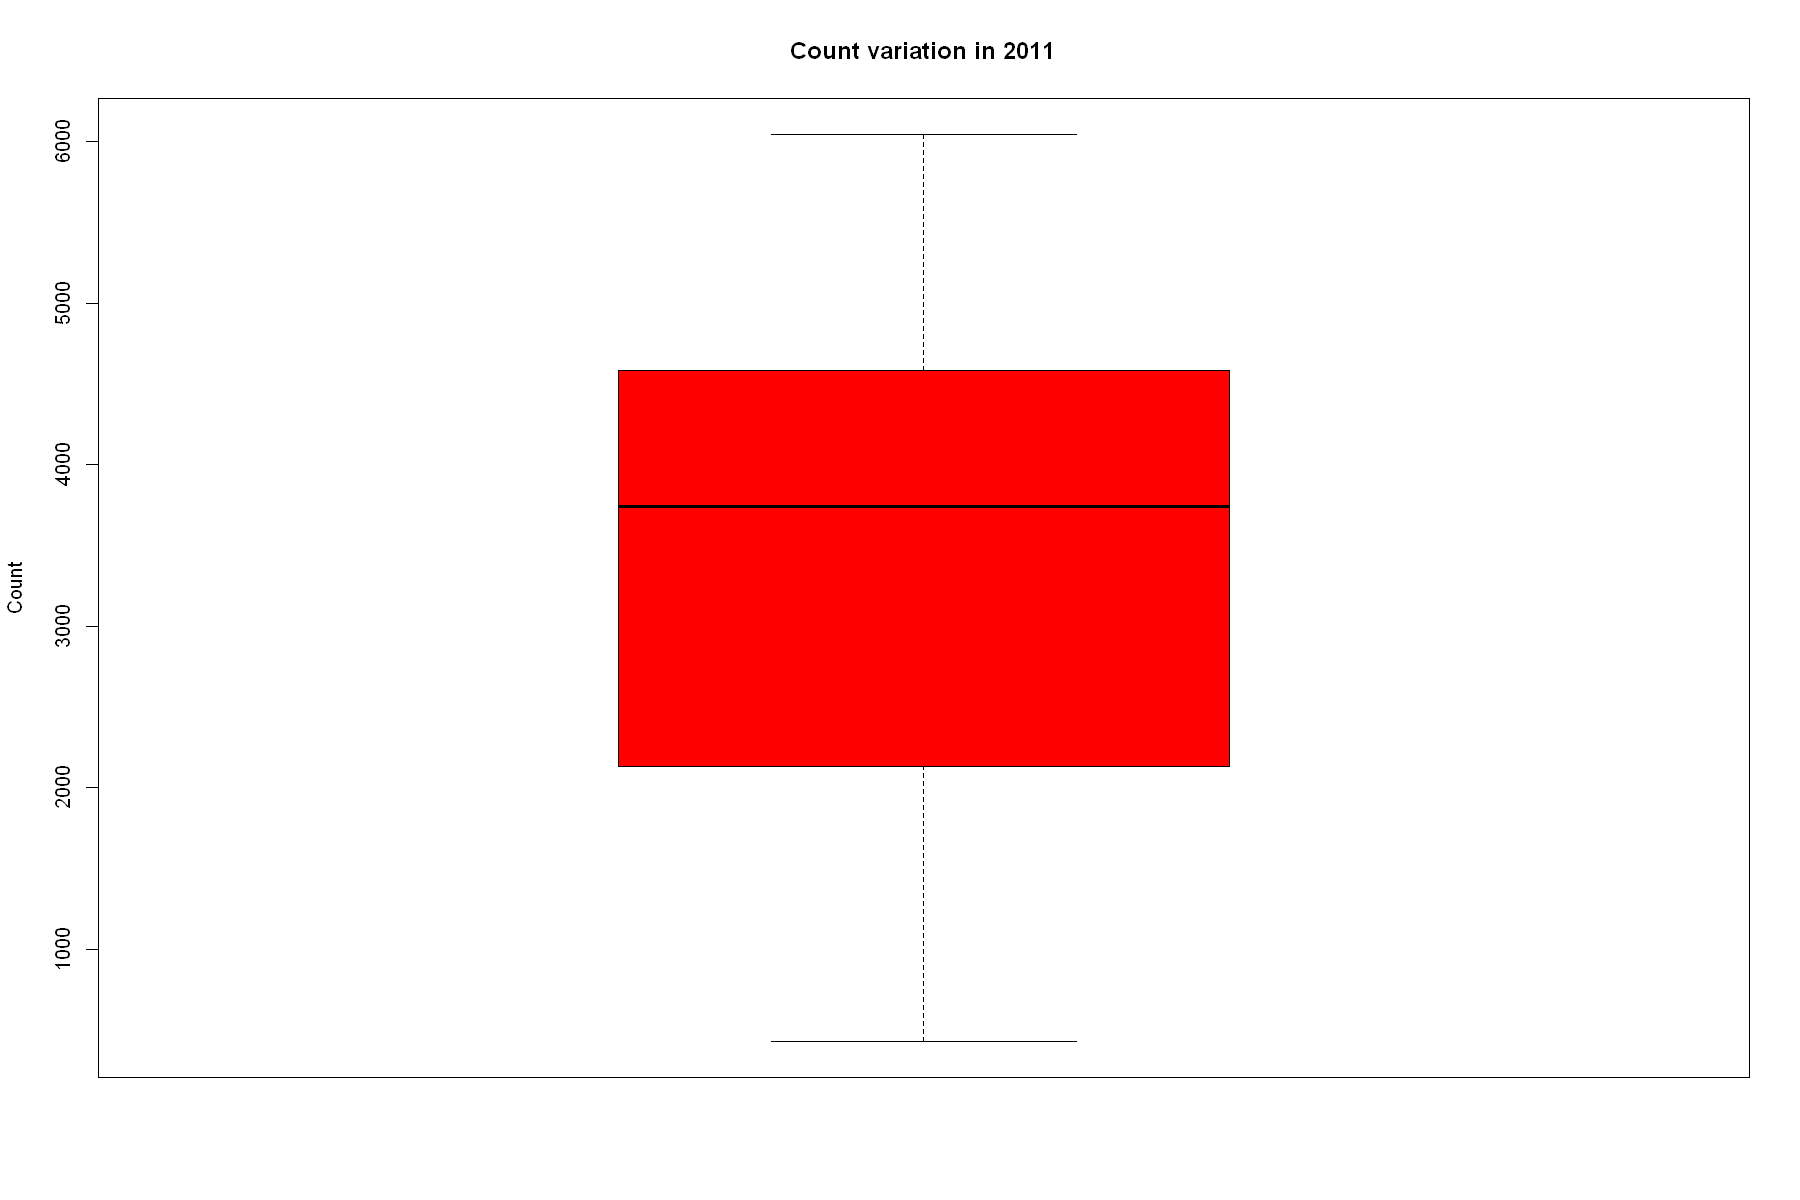

In [22]:
boxplot(year_2011$cnt, main = "Count variation in 2011", ylab = "Count", col = "red")

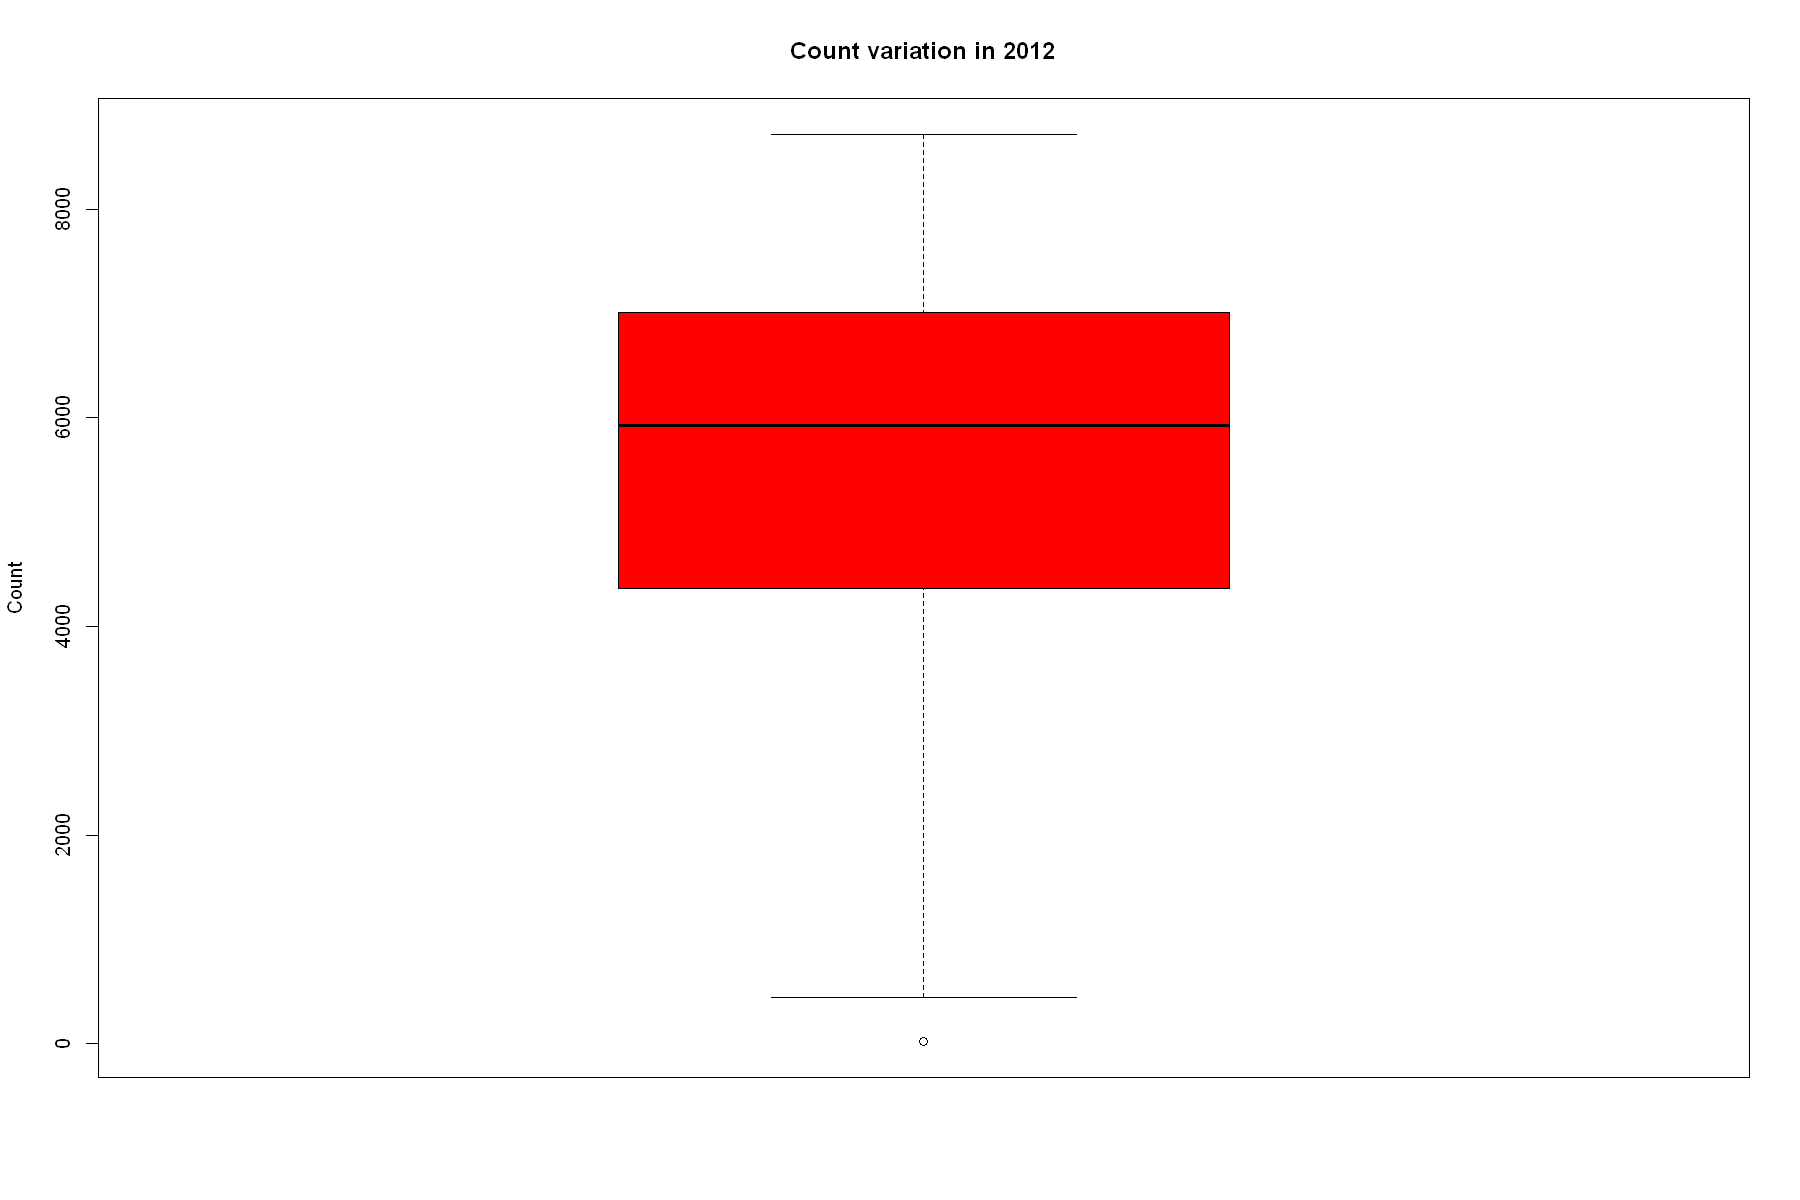

In [23]:
boxplot(year_2012$cnt, main = "Count variation in 2012", ylab = "Count", col = "red")

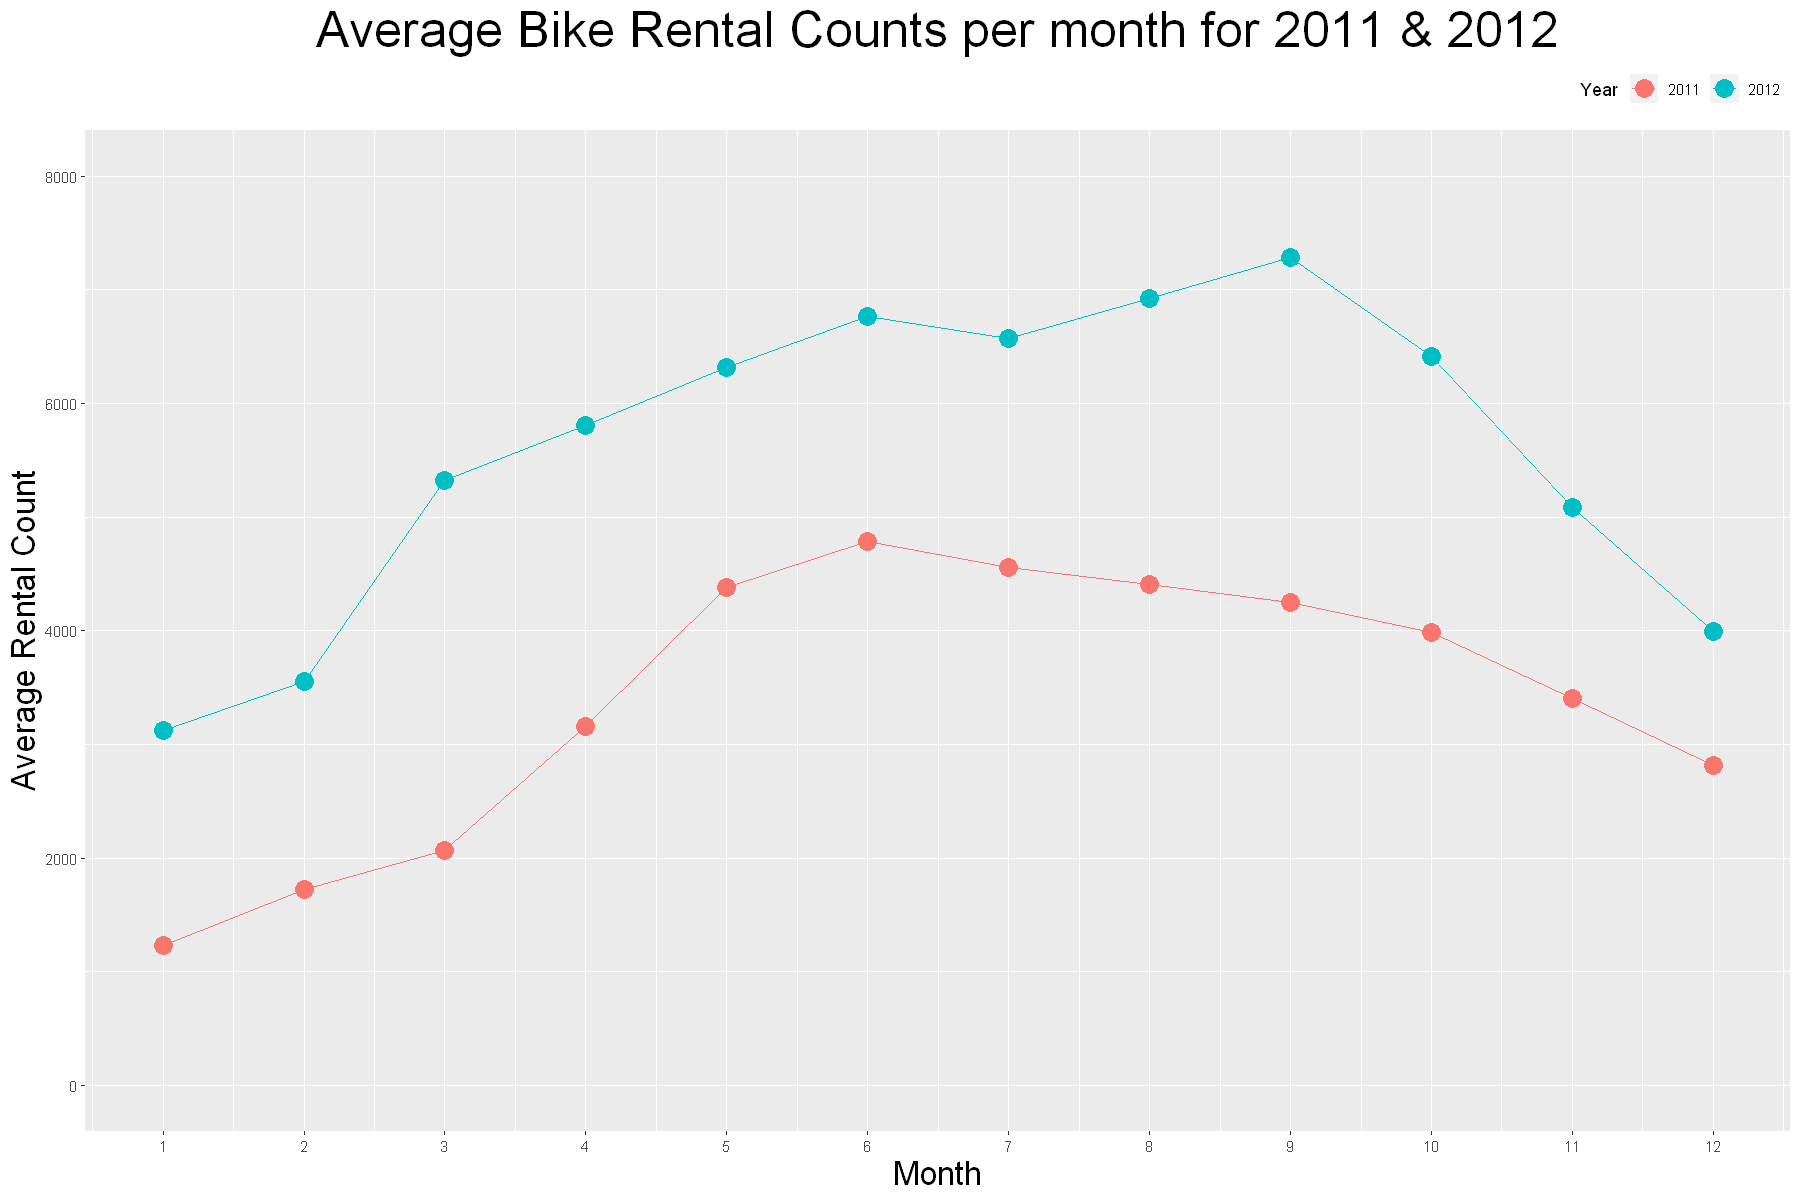

In [24]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(myavg, aes(x = mnth, y = cnt, color = yr)) +
  geom_point(size= 5) +
  geom_line() +
  labs(title = "Average Bike Rental Counts per month for 2011 & 2012",
       x = "Month",
       y = "Average Rental Count",
       color = "Year") +
theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30, hjust = 0.5),
      legend.position = "top", legend.justification = "right")+
scale_x_continuous(breaks = seq(1, 12, by = 1)) + 
scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 2000))
